### Import module


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


### Plot Params

In [21]:
plt.style.use('seaborn-v0_8-whitegrid') 
params = {
    'figure.figsize': (8, 6),
    'axes.labelsize': 12,
    'figure.titlesize': 16,
    'axes.titlesize': 14,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'lines.linewidth': 1.5,
    'lines.markersize': 4,
    'legend.fontsize': 11,
    'legend.framealpha': 0.8,
    'legend.loc': 'best',
    'figure.dpi': 120,
    'savefig.dpi': 150,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.5,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'figure.constrained_layout.use': True,
    'text.usetex': True, 
}
plt.rcParams.update(params)

### Input processing

In [22]:
project_name = "RC_freq"

data = np.genfromtxt(f'../input/{project_name}.csv', delimiter=';', skip_header=1)
f_data , Vin_data, Vout_data , Vfs_data, t_data, tfs_data = data.T
A_data = Vout_data / Vin_data
phi_data = 2*np.pi*f_data*np.array(t_data)*1e-6/(np.pi/2.) # norm to 1
phi_fs = 2*np.pi*f_data*np.array(tfs_data)*1e-6/(np.pi/2.)
for x, y ,z in tuple(zip(f_data, A_data,phi_data)):
    print(f"f = {x:.2f} Hz, A = {y:.2f}, phi = {z:.2f}")

f = 500.00 Hz, A = 1.01, phi = 0.06
f = 1000.00 Hz, A = 0.97, phi = 0.12
f = 1500.00 Hz, A = 0.95, phi = 0.18
f = 2000.00 Hz, A = 0.93, phi = 0.24
f = 2500.00 Hz, A = 0.90, phi = 0.28
f = 3000.00 Hz, A = 0.87, phi = 0.33
f = 3500.00 Hz, A = 0.83, phi = 0.37
f = 4000.00 Hz, A = 0.79, phi = 0.40
f = 4500.00 Hz, A = 0.75, phi = 0.44
f = 5000.00 Hz, A = 0.72, phi = 0.47
f = 5500.00 Hz, A = 0.69, phi = 0.50
f = 6000.00 Hz, A = 0.66, phi = 0.53
f = 6500.00 Hz, A = 0.63, phi = 0.55
f = 7000.00 Hz, A = 0.61, phi = 0.58
f = 7500.00 Hz, A = 0.57, phi = 0.60
f = 8000.00 Hz, A = 0.55, phi = 0.61
f = 27000.00 Hz, A = 0.20, phi = 0.86
f = 40000.00 Hz, A = 0.14, phi = 0.91
f = 70000.00 Hz, A = 0.08, phi = 0.94
f = 97000.00 Hz, A = 0.06, phi = 0.96
f = 170000.00 Hz, A = 0.03, phi = 1.02
f = 270000.00 Hz, A = 0.02, phi = 1.06
f = 430000.00 Hz, A = 0.01, phi = 0.86
f = 680000.00 Hz, A = 0.01, phi = 0.60
f = 1000000.00 Hz, A = 0.01, phi = 0.62
f = 1700000.00 Hz, A = 0.01, phi = 0.45
f = 2700000.00 Hz, A 

### Errors


In [23]:
Vin_errL = Vfs_data[0]/10*0.41
Vout_errL = Vfs_data/10*0.41
phi_errL = phi_fs/10*0.41*np.sqrt(2)
A_err= A_data*np.sqrt((Vout_errL/Vout_data)**2 + (Vin_errL/Vin_data)**2+2*(0.03*0.41)**2)
A_err[Vfs_data > 0.9] = A_data[Vfs_data > 0.9] * np.sqrt((Vout_errL[Vfs_data > 0.9] / Vout_data[Vfs_data > 0.9])**2 + (Vin_errL / Vin_data[Vfs_data > 0.9])**2)
print(A_err)

[0.00830695 0.00809701 0.00805118 0.00796036 0.00782636 0.00775804
 0.00760647 0.00745917 0.00733652 0.00721737 0.0071019  0.00702706
 0.00691813 0.00684782 0.00679436 0.00672791 0.00387671 0.00281124
 0.00160099 0.00123326 0.00069714 0.00041833 0.00029243 0.00023106
 0.0001757  0.000165   0.00015237]


In [43]:
#Ft initial guess
ft = 5400


# Local fit interval
f_min = 3000
f_max = 9000

### Plot Raw Data


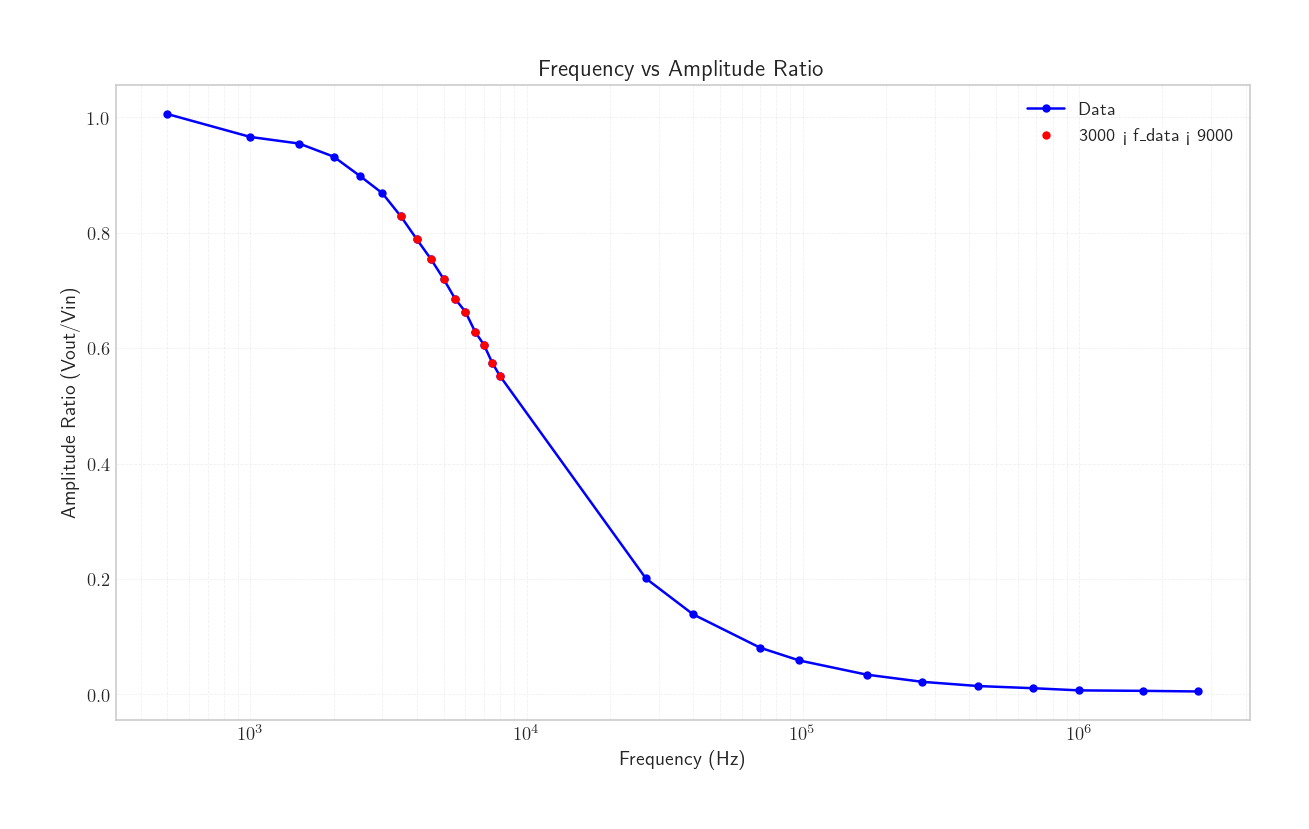

In [25]:
# Plot the data with red markers for points where f_min < f_data < f_max
plt.figure(figsize=(10, 6))
plt.plot(f_data, A_data, marker='o', linestyle='-', color='b', label='Data')
plt.scatter(f_data[(f_data > f_min) & (f_data < f_max)], A_data[(f_data > f_min) & (f_data < f_max)], color='r', label='3000 < f_data < 9000', zorder=5)
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude Ratio (Vout/Vin)')
plt.title('Frequency vs Amplitude Ratio')
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.savefig(f'../output/{project_name}_rawdata.png')
plt.show()



### Local fit

In [26]:
# Define the model function for the fit
def fit_lin(x,m,q):
    fitval = m * x + q
    return fitval


In [27]:
# Define the data for the fit
# Select the data points for the fit (f_min < f_data < f_max)
x = f_data[(f_data > f_min) & (f_data < f_max)]
y = A_data[(f_data > f_min) & (f_data < f_max)]
z = phi_data[(f_data > f_min) & (f_data < f_max)]
y_err = A_err[(f_data > f_min) & (f_data < f_max)]
z_err = phi_errL[(f_data > f_min) & (f_data < f_max)]
N = len(x)

# Fit the data using curve_fit
popt_A, pcov_A = curve_fit(fit_lin, x, y, sigma=y_err,p0=[-0.1, 1], method='lm', absolute_sigma=True)
popt_phi, pcov_phi = curve_fit(fit_lin, x, z, sigma=z_err,p0=[0.1, 0], method='lm', absolute_sigma=True)


In [28]:
# build residuals data
residuA = y - fit_lin(x, *popt_A)
residuphi = z - fit_lin(x, *popt_phi)

# variables error and chi2
perr_A = np.sqrt(np.diag(pcov_A))
chisq_A = np.sum((residuA / y_err)**2)
perr_phi = np.sqrt(np.diag(pcov_phi))
chisq_phi = np.sum((residuphi / z_err)**2)
df = N - 2

# breakpoint frequency
ft_A = (1 / np.sqrt(2) - popt_A[1]) / popt_A[0]
ft_phi = (0.5 - popt_phi[1]) / popt_phi[0]
corr = -1 * np.mean(x) / np.sqrt(np.var(x) + np.mean(x)**2)

err_ft_A = np.sqrt((ft_A / popt_A[0])**2 * perr_A[0]**2 + (1 / popt_A[0])**2 * perr_A[1]**2 + 2 * ft_A / popt_A[0]**2 * pcov_A[0, 1])
err_ft_phi = np.sqrt((ft_phi / popt_phi[0])**2 * perr_phi[0]**2 + (1 / popt_phi[0])**2 * perr_phi[1]**2 + 2 * ft_phi / popt_phi[0]**2 * pcov_phi[0, 1])

ft_stima = []
ft_stima.append(['A,loc', ft_A, err_ft_A])
ft_stima.append(['$\phi$,loc', ft_phi, err_ft_phi])

<>:22: SyntaxWarning: invalid escape sequence '\p'
<>:22: SyntaxWarning: invalid escape sequence '\p'
C:\Users\bagno\AppData\Local\Temp\ipykernel_20072\3409266044.py:22: SyntaxWarning: invalid escape sequence '\p'
  ft_stima.append(['$\phi$,loc', ft_phi, err_ft_phi])


In [29]:
# Extract and print best fit parameters and errors

print("\n ============== BEST FIT Lin Loc - SciPy ====================")
print("\n ================== From A ========================")
print( r' slope m = {a:.3e} +/- {b:.1e} s'.format(a=popt_A[0], b=perr_A[0]))
print( r' intercept q = {c:.3f} +/- {d:.3f} '.format(c=popt_A[1],d=perr_A[1]))
print(r' chisq/ndf = {e:.2f}'.format(e=chisq_A/df))
print(r' breakpoint frequency = {e:.0f} +/- {d:.0f} Hz'.format(e=ft_A, d=err_ft_A))
print("\n ================== from phi ========================")
print( r' slope m = {a:.3e} +/- {b:.1e} s'.format(a=popt_phi[0], b=perr_phi[0]))
print( r' intercept q = {c:.3f} +/- {d:.3f} '.format(c=popt_phi[1],d=perr_phi[1]))
print(r' chisq/ndf = {e:.2f}'.format(e=chisq_phi/df))
print(r' breakpoint frequency = {e:.0f} +/- {d:.0f} Hz'.format(e=ft_phi, d=err_ft_phi))
print("=============================================================\n")


 ============== BEST FIT Lin Loc - SciPy ====================

 ================== From A ========================
 slope m = -6.067e-05 +/- 1.6e-06 s
 intercept q = 1.029 +/- 0.009 
 chisq/ndf = 0.92
 breakpoint frequency = 5303 +/- 40 Hz

 ================== from phi ========================
 slope m = 5.783e-05 +/- 2.8e-06 s
 intercept q = 0.174 +/- 0.015 
 chisq/ndf = 0.51
 breakpoint frequency = 5635 +/- 73 Hz



### Local Fit Plot

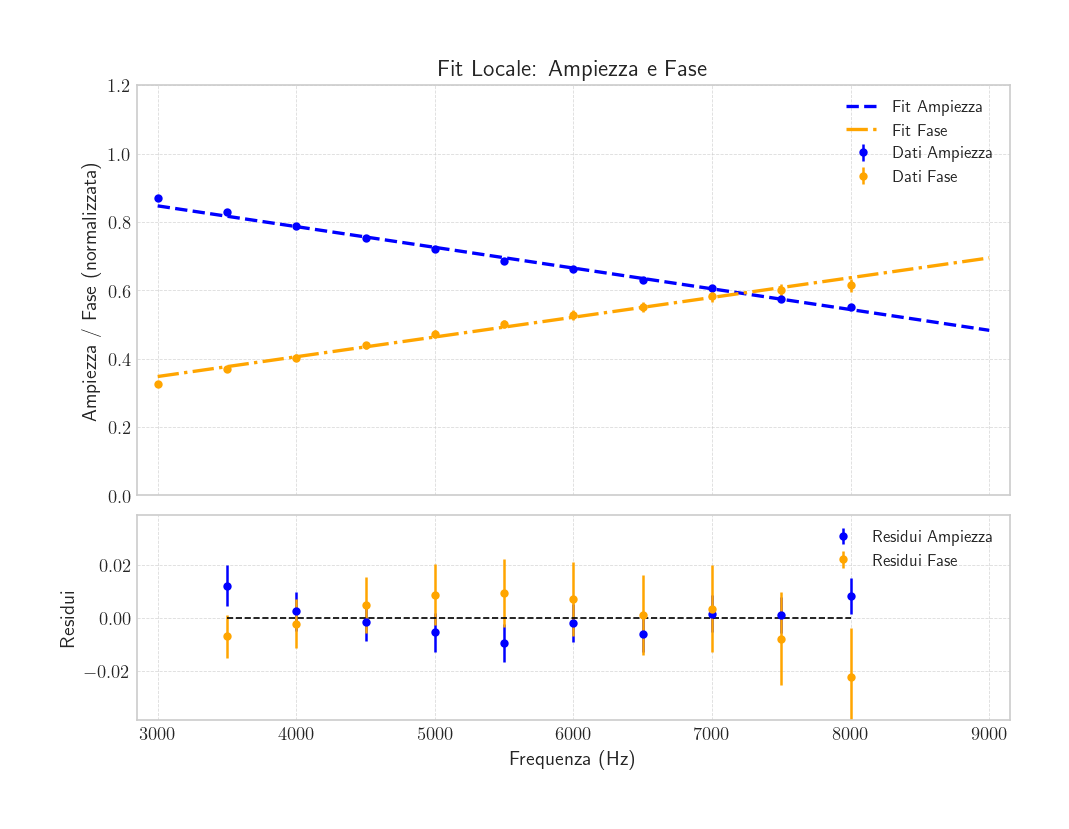

In [34]:
# Updated the plot to keep labels in Italian and remove results from the graph
x_fit = np.linspace(f_min, f_max, 1000)
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True, constrained_layout=True, height_ratios=[2, 1])

# Top plot: Data and fits
ax[0].plot(x_fit, fit_lin(x_fit, *popt_A), label='Fit Ampiezza', linestyle='--', color='blue', linewidth=2)
ax[0].plot(x_fit, fit_lin(x_fit, *popt_phi), label='Fit Fase', linestyle='-.', color='orange', linewidth=2)
ax[0].errorbar(f_data, A_data, yerr=A_err, fmt='o', ms=4, color='blue', label='Dati Ampiezza')
ax[0].errorbar(f_data, phi_data, yerr=phi_errL, fmt='o', ms=4, color='orange', label='Dati Fase')
ax[0].set_xlim(f_min - 300 / 2, f_max + 300 / 2)
ax[0].set_ylim(0, 1.2)
ax[0].legend(loc='upper right', fontsize=10)
ax[0].set_ylabel(r'Ampiezza / Fase (normalizzata)', fontsize=12)
ax[0].set_title('Fit Locale: Ampiezza e Fase', fontsize=14)
ax[0].grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)

# Bottom plot: Residuals
ax[1].errorbar(x, residuA, yerr=y_err, fmt='o', label='Residui Ampiezza', ms=4, color='blue')
ax[1].errorbar(x, residuphi, yerr=z_err, fmt='o', label='Residui Fase', ms=4, color='orange')
R_ylim = np.std(residuA) * 5 + np.max(y_err)
ax[1].set_ylim([-1 * R_ylim, R_ylim])
ax[1].set_ylabel('Residui', fontsize=12)
ax[1].set_xlabel('Frequenza (Hz)', fontsize=12)
ax[1].plot(x, np.zeros(N), linestyle='--', color='black', linewidth=1)
ax[1].legend(fontsize=10)
ax[1].grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)

# Save the updated plot
plt.savefig(f'../output/{project_name}_localfit.png', dpi=300)
plt.show()

### Bode Diagram

In [ ]:
# Interval for the bode plot
f_min = 3000
f_max = 2800000

x = np.log10(f_data[(f_data > f_min) & (f_data < f_max)] / ft_A)
y = 20 * np.log10(A_data[(f_data > f_min) & (f_data < f_max)])
y_err_logA = 20 * 1 / A_data[(f_data > f_min) & (f_data < f_max)] * A_err[(f_data > f_min) & (f_data < f_max)]
#print(y, y_err_logA)

N = len(x)

popt_logA, pcov_logA = curve_fit(fit_lin, x, y, p0=[-20, 0], method='lm', sigma=y_err_logA,absolute_sigma=True)
custom_fit_lin = lambda var_x, q: fit_lin(var_x, -20, q)
popt_logA2, pcov_logA2 = curve_fit(custom_fit_lin, x, y, p0=[0], method='lm', sigma=y_err_logA,absolute_sigma=True)


[ -1.63340093  -2.06317925  -2.44928235  -2.85335007  -3.27713605
  -3.57160119  -4.03290727  -4.35464367  -4.81098497  -5.1655603
 -13.94182588 -17.15669723 -21.85027293 -24.62414146 -29.31680489
 -33.23739667 -36.79027629 -39.40755067 -43.17133828 -44.26831164
 -45.9190094 ] [0.18360435 0.18918184 0.19452887 0.20048247 0.20713879 0.21202328
 0.22012236 0.22610738 0.23644372 0.2438866  0.38599763 0.40528705
 0.39621744 0.42004078 0.40755831 0.38408165 0.40416742 0.43165058
 0.50626112 0.53943621 0.60237741]


In [41]:
# build residuals data
residulogA = y - fit_lin(x, *popt_logA)
residulogA2 = y - custom_fit_lin(x, *popt_logA2)

# variables error and chi2
perr_logA = np.sqrt(np.diag(pcov_logA))
chisq_logA = np.sum((residulogA/y_err_logA)**2)
perr_logA2 = np.sqrt(np.diag(pcov_logA2))
chisq_logA2 = np.sum((residulogA2/y_err_logA)**2)
df = N - 2

ft_bode1 = 10**(-1*popt_logA[1]/popt_logA[0])
ft_bode2 = 10**(popt_logA2[0])
err_ft_bode1 = np.sqrt((ft_bode1/popt_logA[0]*np.log(10))**2*perr_logA[0]**2+(ft_bode1*popt_logA[1]/popt_logA[0]**2*np.log(10))**2*perr_logA[1]**2-2*(ft_bode1/popt_logA[0]*np.log(10))*(ft_bode1*popt_logA[1]/popt_logA[0]**2*np.log(10))*pcov_logA[0,1])
err_ft_bode2 = ft_bode2*np.log(10)*perr_logA2[0]


ft_stima.append(['Bode', ft_bode1, err_ft_bode1])
print(ft_bode1, err_ft_bode1)
print(ft_bode2, err_ft_bode2)

0.6410211129615426 0.007960492155434621
0.006090901344653295 0.0008255897298228111


### Fit non lineare


In [42]:
def fit_nlin_A(x, ft):
    fitval = 1/np.sqrt(1+(x/ft)**2)
    return fitval

def fit_nlin_phi(x, ft):
    fitval = np.arctan(x/ft)*2/np.pi
    return fitval

In [44]:
x = f_data
y = A_data
z = phi_data
y_err_A = A_err
z_err_phi = phi_errL
N = len(x)
popt_nl_A, pcov_nl_A = curve_fit(fit_nlin_A, x, y, p0=[ft], method='lm', sigma=y_err_A,absolute_sigma=True)
popt_nl_phi, pcov_nl_phi = curve_fit(fit_nlin_phi, x, z, p0=[ft], method='lm', sigma=z_err_phi,absolute_sigma=True)


In [45]:
# build residuals data
residu_nl_A = y - fit_nlin_A(x, *popt_nl_A)
residu_nl_phi =  z - fit_nlin_phi(x, *popt_nl_phi)

# variables error and chi2
perr_nl_A = np.sqrt(np.diag(pcov_nl_A))
chisq_nl_A = np.sum((residu_nl_A/y_err_A)**2)
perr_nl_phi = np.sqrt(np.diag(pcov_nl_phi))
chisq_nl_phi = np.sum((residu_nl_phi/z_err_phi)**2)
df = N - 2

# frequenza di taglio
ft_nl_A = popt_nl_A[0]
ft_nl_phi = popt_nl_phi[0]
err_ft_A = perr_nl_A[0]
err_ft_phi = perr_nl_phi[0]


ft_stima.append(['A,nl', ft_nl_A, err_ft_A])
ft_stima.append(['$\phi$,nl', ft_nl_phi, err_ft_phi])

<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
C:\Users\bagno\AppData\Local\Temp\ipykernel_20072\4143546657.py:20: SyntaxWarning: invalid escape sequence '\p'
  ft_stima.append(['$\phi$,nl', ft_nl_phi, err_ft_phi])


In [46]:
print("\n ============== BEST FIT Non Lineare - SciPy ====================")
print("\n ================== Modulo ========================")
print(r' chisq/ndf = {e:.2f}'.format(e=chisq_nl_A/df))
print(r' breakpoint frequency = {e:.0f} +/- {d:.0f} Hz'.format(e=ft_nl_A, d=err_ft_A))
print("\n ================== fase ========================")
print(r' chisq/ndf = {e:.2f}'.format(e=chisq_nl_phi/df))
print(r' breakpoint frequency = {e:.0f} +/- {d:.0f} Hz'.format(e=ft_nl_phi, d=err_ft_phi))
print("=============================================================\n")


 ============== BEST FIT Non Lineare - SciPy ====================

 ================== Modulo ========================
 chisq/ndf = 40.39
 breakpoint frequency = 5603 +/- 27 Hz

 ================== fase ========================
 chisq/ndf = 137.90
 breakpoint frequency = 5404 +/- 53 Hz



### Non linear fit plot

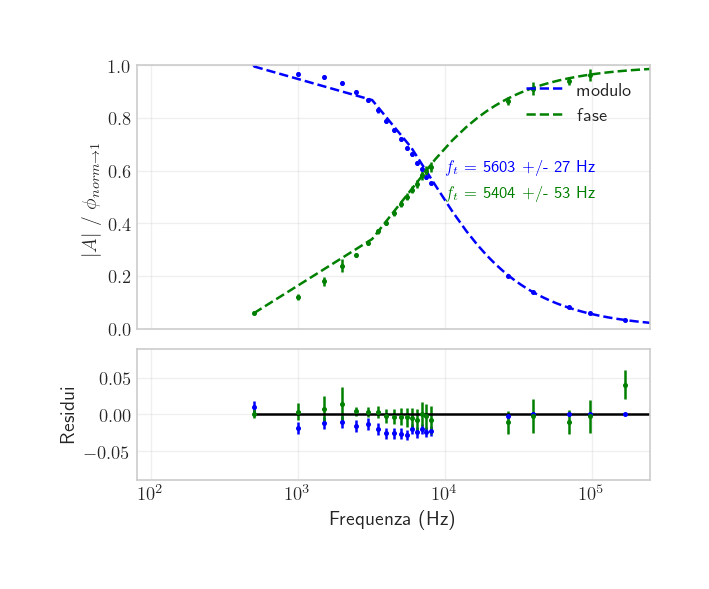

In [48]:
# fit tracciato con mille punti fra la freq min e max
x_fit = np.linspace(np.min(x), np.max(x), 1000)

"""
# Plot data, fit and residuals
"""

fig, ax = plt.subplots(2, 1, figsize=(5, 4),sharex=True, constrained_layout = True, height_ratios=[2, 1])
ax[0].plot(x_fit, fit_nlin_A(x_fit, *popt_nl_A), label='modulo', linestyle='--', color='blue')
ax[0].plot(x_fit,fit_nlin_phi(x_fit,*popt_nl_phi), label='fase', linestyle='--', color='green')
ax[0].errorbar(f_data,A_data,yerr=A_err, fmt='o',ms=2,color='blue') # , label=r'data'
ax[0].errorbar(f_data,phi_data,yerr=phi_errL, fmt='o',ms=2,color='green') #, label=r'data'
ax[0].set_xlim(80,250000)
ax[0].set_ylim(0,1)
ax[0].set_xscale('log')
ax[0].legend(loc='upper right')
ax[0].set_ylabel(r'$\left|A\right|$ / $\phi_{norm \to 1}$')
#ax[0].set_xticks([2,3,4,5])

ax[0].text(10000,0.5,r'$f_t$ = {e:.0f} +/- {d:.0f} Hz'.format(e=ft_nl_phi, d=err_ft_phi), size=10, color='green')
ax[0].text(10000,0.6,r'$f_t$ = {e:.0f} +/- {d:.0f} Hz'.format(e=ft_nl_A, d=err_ft_A), size=10, color='blue')

ax[1].errorbar(x,residu_nl_A,yerr=y_err_A, fmt='o', label=r'modulo',ms=2,color='blue')
ax[1].errorbar(x,residu_nl_phi,yerr=z_err_phi, fmt='o', label=r'fase ',ms=2,color='green')
R_ylim = np.std(residuA)*5 + np.max(y_err_A)+0.05
ax[1].set_ylim([-1*R_ylim,R_ylim])
ax[1].set_xscale('log')
ax[1].set_ylabel(r'Residui')
ax[1].set_xlabel(r'Frequenza (Hz)',loc='center')
ax[1].plot(x,np.zeros(N),color='black')

plt.savefig(f'../output/{project_name}_nonlinfit.png', dpi=300)

plt.show()